<a href="https://colab.research.google.com/github/Rutujabhonde18/DataScience_Internship/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font><h1><b>OASIS INFOBYTE INTERNSHIP September-23</b></h1></font>
<font><h2><b><i>DATA SCIENCE</i></b></h2></font>

<font><h2><b><u>Task 2 : 'UNEMPLOYMENT ANALYSIS WITH PYTHON'</u> </b></h2></font>

<font><h3><b>Intern : Rutuja Madan Bhonde</b></h3></font>

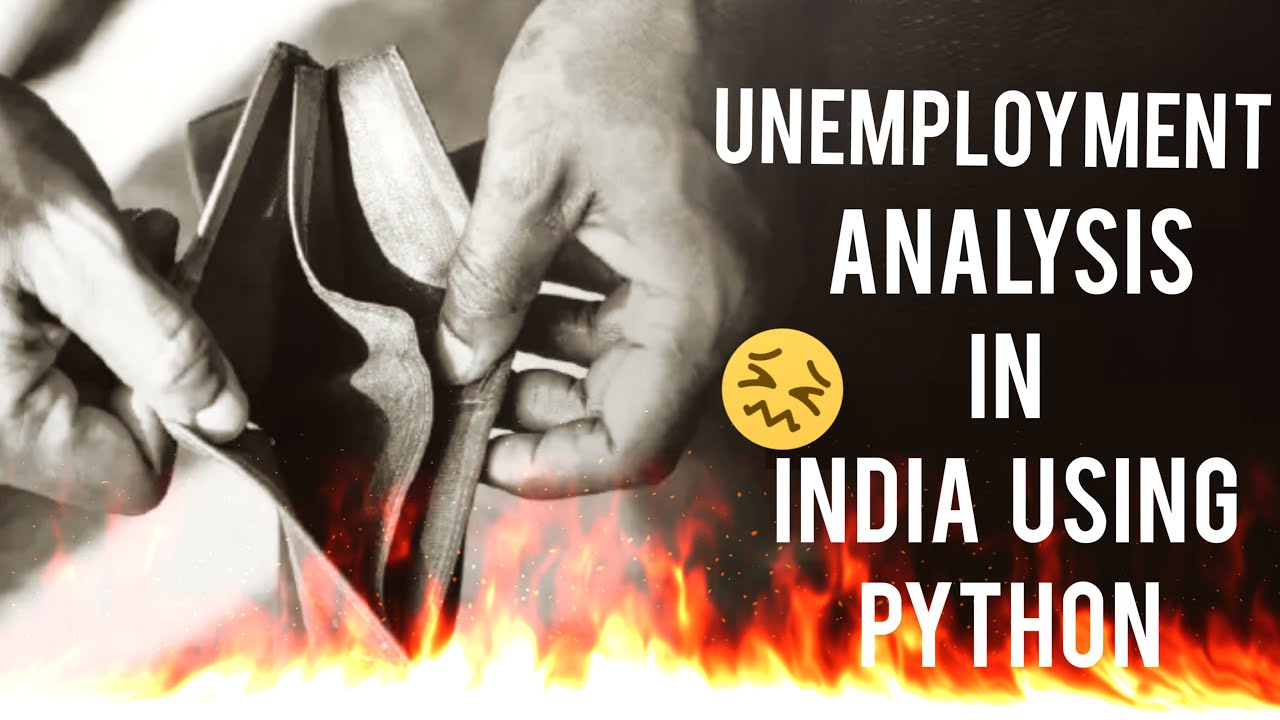

**PROBLEM STATEMENT** : Unemployment is measured by the number of people who are unemployed. During Covid-19 the unemployment rate was increasing, so we analyzing the unemployment rate.



# **Importing Libraries**

In [ ]:
# Import libraries for Analysis
import numpy as np
import pandas as pd
import re

# Import Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

# **Import dataset**

In [ ]:
# Import 1st dataset
data1 = pd.read_csv("/content/Unemployment in India.csv")

In [ ]:
# Import 2nd dataset
data2 = pd.read_csv("/content/Unemployment_Rate_upto_11_2020.csv")

# **Data Analysis**

In [ ]:
# 1st 5 rows in 1st dataset
data1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
# 1st 5 rows in 2nd dataset
data2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
# Check rows & columns
data2.shape

(267, 9)

In [ ]:
# Basic status about data
data2.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [ ]:
# To get information about datatype
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
# To check null values
data2.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [ ]:
# To find duplicasy in data
data2.duplicated().sum()

0

So, there will be no null values as well as no duplicasy found in dataset.

But, we found that the columns name was not proper so, we have to first change the name of columns.

In [ ]:
# Rename column name
data2.columns = ['States','Data','Freuency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Region','longitude','latitude']

In [ ]:
data2.head()

,States,Data,Freuency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


We don't need freuency column So,we can remove them

In [ ]:
# Remove Freuency column
del data2['Freuency']

In [ ]:
data2.head()

,States,Data,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,17.43,12988845,36.46,South,15.9129,79.74


# **Data Exploration**

<ipython-input-56-239d2669e873>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



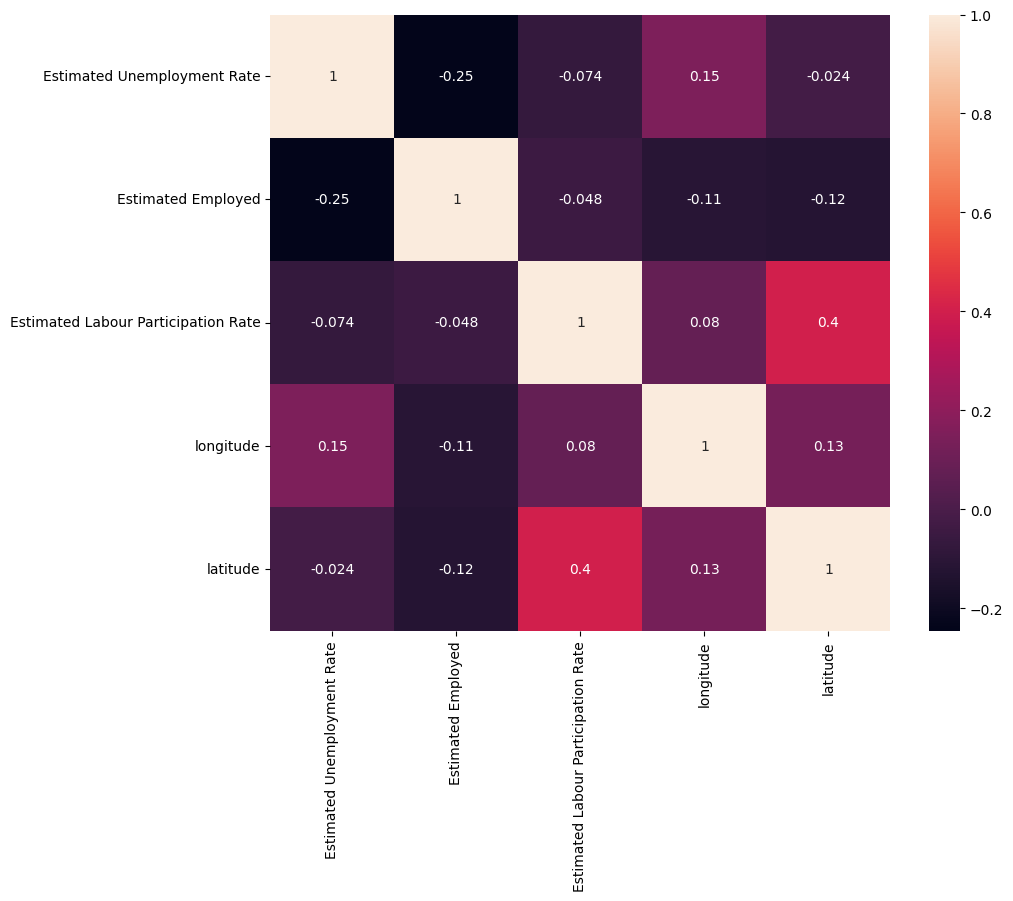

In [ ]:
# plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data2.corr(),annot=True)
plt.show()

Now, we can examine number of unemployment rate according to differet Regions in India

In [ ]:
figure = px.bar(data2, x='Region', y='Estimated Unemployment Rate', color='Region',
                title='Unemployment Rate (Region wise) Bar Graph', template="plotly")

figure.update_layout(xaxis={'categoryorder': 'total descending'})
figure.show()

Now, we create a dashboard to analyze unemployment rate of each Indian State.

We use, 'sunburst' plot.

In [ ]:
Unemployment = data2[['States', 'Data', 'Estimated Unemployment Rate']]
figure = px.sunburst(Unemployment,path=['States'],
                     values='Estimated Unemployment Rate',
                     width=600,height=600,
                     title="Unemployment Rate in India")
figure.show()

# **Conclussion**

1. So, we can say that Region wise most unemployed found from 'North' Region nearly 1300%.

2. And when we talk about state wise the most unemployed found from 'Haryana' about 274 rate.